In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from docplex.mp.model import Model
import yfinance as yf

In [69]:
asset_names = ['A', 'B']
mu_vec = [0.08, 0.03]
s = [0.12, 0.11]
ro = 0.15
cov = ro*(s[0]*s[1])

In [76]:
mat = np.matrix(
    [[s[0]**2, cov],
     [cov, s[1]**2]]
)
df_cov = pd.DataFrame(mat, columns=asset_names, index=asset_names)
df_cov

,A,B
A,0.01440,0.00198
B,0.00198,0.01210


In [75]:
mdl = Model(name='markowitz')
# Decision variables
w = mdl.continuous_var_list(df_cov.index, name='w')
# Constraints
mdl.add_constraint(mdl.sum(w) == 1)
# Objective function
N = len(df_cov.columns)
corr_exp = mdl.sum([w[i] * w[j] * df_cov.values[i][j] for i in range(N) for j in range(N)])
mdl.minimize(corr_exp)
# Solve model
mdl.solve()
mdl.report()
# Print stocks weights
for i in range(N):
    print(w[i], np.round(w[i].solution_value, 3))

* model markowitz solved with objective = 0.008
w_A 0.449
w_B 0.551


In [85]:
exp_return = w[0].solution_value * mu_vec[0] + w[1].solution_value * mu_vec[1]
np.round(exp_return, 3)

0.052

In [86]:
exp_std = w[0].solution_value * s[0] + w[1].solution_value * s[1]
np.round(exp_std, 3)

0.114

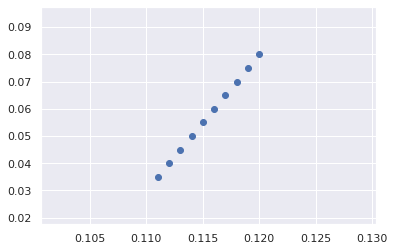

In [87]:
weights = [(1 - i, i) for i in np.arange(0.0, 1, 0.1)]
returns = [mu_vec[0]*w1 + mu_vec[1]*w2 for w1, w2 in weights]
stds = [s[0]*w1 + s[1]*w2 for w1, w2 in weights]
plt.scatter(x=stds, y=returns)

In [103]:
N = len(df_cov.columns)
mdl = Model(name='markowitz')
# Decision variables
w = mdl.continuous_var_list(df_cov.index, name='w', ub=100, lb=-100)
# Constraints
mdl.add_constraint(mdl.sum(w) == 1)
mdl.add_constraint((mu_vec[0] * w[0] + mu_vec[1] * w[1]) >= 0.10)
# Objective function
corr_exp = mdl.sum([w[i] * w[j] * df_cov.values[i][j] for i in range(N) for j in range(N)])
mdl.minimize(corr_exp)
# Solve model
mdl.solve()
mdl.report()
# Print stocks weights
for i in range(N):
    print(w[i], np.round(w[i].solution_value, 3))

* model markowitz solved with objective = 0.028
w_A 1.4
w_B -0.4


In [104]:
exp_std = w[0].solution_value * s[0] + w[1].solution_value * s[1]
np.round(exp_std, 3)

0.124

# Data Collecting

In [8]:
start_date = '2020-08-01'
end_date = '2020-09-01'

In [9]:
# ticker_list = ['DTEX3.SA', 'OMGE3.SA', 'RAPT4.SA', 'VLID3.SA', 'WEGE3.SA'] # Junho
# ticker_list = ['GGBR4.SA', 'LINX3.SA', 'EZTC3.SA', 'VVAR3.SA', 'IRBR3.SA'] # Julho
# ticker_list = ['CCRO3.SA', 'FLRY3.SA', 'RADL3.SA', 'DTEX3.SA', 'RAPT4.SA'] # Agosto
ticker_list = ['LREN3.SA', 'QUAL3.SA', 'TAEE11.SA', 'TOTS3.SA', 'VVAR3.SA'] # Setembro

In [10]:
data = yf.download(ticker_list, start_date, end_date)

[*********************100%***********************]  5 of 5 completed


In [11]:
data.head()

Adj Close                                                  Close  \
             LREN3.SA   QUAL3.SA  TAEE11.SA   TOTS3.SA   VVAR3.SA   LREN3.SA   
Date                                                                           
2020-08-03  40.820000  27.990000  27.855869  25.762154  20.110001  40.820000   
2020-08-04  39.480000  27.920000  27.826702  25.871864  19.860001  39.480000   
2020-08-05  40.740002  28.129999  27.632246  25.931707  20.000000  40.740002   
2020-08-06  42.849998  28.879999  28.089218  28.744299  19.590000  42.849998   
2020-08-07  43.220001  28.680000  27.962822  28.704405  19.030001  43.220001   

                                                        ...       Open  \
             QUAL3.SA  TAEE11.SA   TOTS3.SA   VVAR3.SA  ...   LREN3.SA   
Date                                                    ...              
2020-08-03  27.990000  28.650000  25.830000  20.110001  ...  41.119999   
2020-08-04  27.920000  28.620001  25.940001  19.860001  ...  40.680000   
2020-08-05  28.129999  28.420000  26.000000  20.000000  ...  40.000000   
2020-08-06  28.879999  28.889999  28.820000  19.590000  ...  40.700001   
2020-08-07  28.680000  28.760000  28.780001  19.030001  ...  42.000000   

                                                          Volume           \
             QUAL3.SA  TAEE11.SA   TOTS3.SA   VVAR3.SA  LREN3.SA QUAL3.SA   
Date                                                                        
2020-08-03  28.290001  29.160000  25.520000  19.889999   6958400  4800900   
2020-08-04  27.850000  28.510000  25.520000  19.639999  10928200  3811200   
2020-08-05  28.170000  28.750000  26.180000  20.209999   5099200  2987400   
2020-08-06  28.000000  28.500000  26.620001  20.250000  10178300  2741700   
2020-08-07  28.590000  28.809999  28.570000  19.480000   8419000  4144400   

                                          
           TAEE11.SA  TOTS3.SA  VVAR3.SA  
Date                                      
2020-08-03   2819100   6911800  83343400  
2020-08-04   2954700   5704500  75470100  
2020-08-05   2136500   4947100  76897400  
2020-08-06   2022200  14825900  65015300  
2020-08-07   1637500   6293400  86845100  

[5 rows x 30 columns]

## Processing adjusted closing prices

In [12]:
df_stocks = data['Adj Close'].pct_change().dropna(axis=0, how='all')
df_stocks

,LREN3.SA,QUAL3.SA,TAEE11.SA,TOTS3.SA,VVAR3.SA
Date,,,,,
2020-08-04,-0.032827,-0.002501,-0.001047,0.004259,-0.012432
2020-08-05,0.031915,0.007521,-0.006988,0.002313,0.007049
2020-08-06,0.051792,0.026662,0.016538,0.108461,-0.020500
2020-08-07,0.008635,-0.006925,-0.004500,-0.001388,-0.028586
2020-08-10,-0.013188,-0.013250,0.005911,-0.074010,0.007357
2020-08-11,-0.003751,0.007067,-0.009679,0.034989,-0.022431
2020-08-12,-0.015062,-0.021053,-0.011169,0.017812,-0.030950
2020-08-13,-0.028913,0.014337,0.019061,-0.003929,0.034141
2020-08-14,0.023868,-0.006007,0.016626,-0.004303,-0.009585


In [13]:
df_stocks.shape

(20, 5)

## Stocks Covariance

,LREN3.SA,QUAL3.SA,TAEE11.SA,TOTS3.SA,VVAR3.SA
LREN3.SA,0.000695,3.858246e-04,4.119179e-05,0.000422,0.000118
QUAL3.SA,0.000386,7.723075e-04,-9.004204e-07,0.000419,0.000346
TAEE11.SA,0.000041,-9.004204e-07,8.056184e-05,0.000016,0.000040
TOTS3.SA,0.000422,4.192235e-04,1.582470e-05,0.001128,-0.000022
VVAR3.SA,0.000118,3.461859e-04,4.017794e-05,-0.000022,0.000870


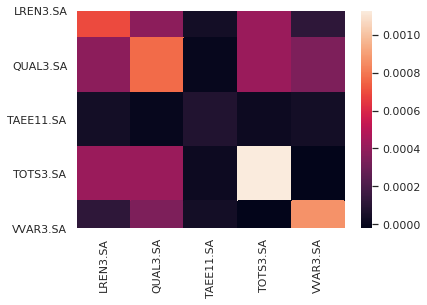

In [14]:
df_cov = df_stocks.cov()
display(df_cov)
sns.heatmap(df_cov)

## Stocks Correlation

,LREN3.SA,QUAL3.SA,TAEE11.SA,TOTS3.SA,VVAR3.SA
LREN3.SA,1.000000,0.526660,0.174093,0.476210,0.152342
QUAL3.SA,0.526660,1.000000,-0.003610,0.449249,0.422423
TAEE11.SA,0.174093,-0.003610,1.000000,0.052506,0.151794
TOTS3.SA,0.476210,0.449249,0.052506,1.000000,-0.021770
VVAR3.SA,0.152342,0.422423,0.151794,-0.021770,1.000000


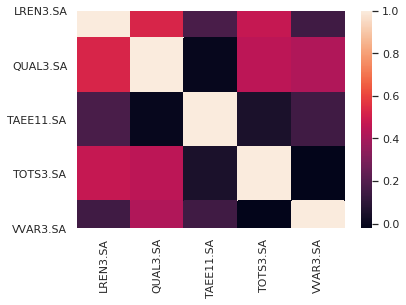

In [9]:
df_corr = df_stocks.corr()
display(df_corr)
sns.heatmap(df_corr)

## Stocks cummulative returns

/home/mario/venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


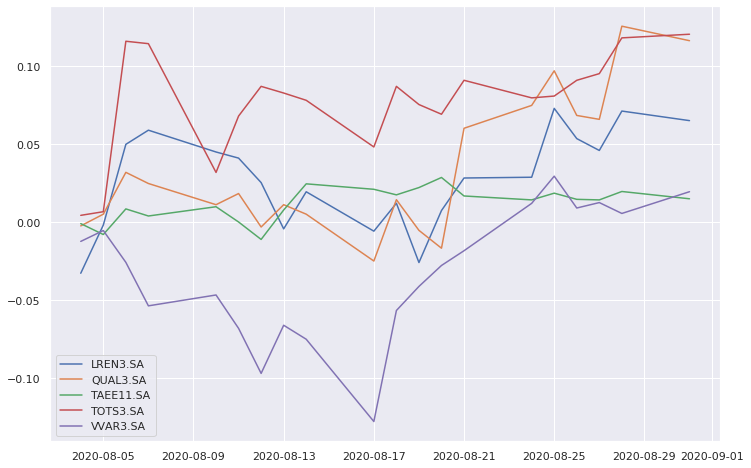

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(df_stocks.add(1).cumprod(axis=0).add(-1))
plt.legend(df_stocks.columns)

# Markowitz Optimization Model

In [11]:
mdl = Model(name='markowitz')
# Decision variables
w = mdl.continuous_var_list(df_stocks.columns, name='w', ub=1, lb=0.05)
# Constraints
mdl.add_constraint(mdl.sum(w) == 1)
# Objective function
N = len(df_stocks.columns)
corr_exp = mdl.sum([w[i] * w[j] * df_corr.values[i][j] for i in range(N) for j in range(N)])
mdl.minimize(corr_exp)
# Solve model
mdl.solve()
mdl.report()
# Print stocks weights
for i in range(N):
    print(w[i], w[i].solution_value)

* model markowitz solved with objective = 0.358
w_LREN3.SA 0.10245953382229789
w_QUAL3.SA 0.06648538918874919
w_TAEE11.SA 0.28396306810365957
w_TOTS3.SA 0.2702318558107446
w_VVAR3.SA 0.2768601530745485


## Formatted Solution

In [12]:
df_solution = pd.DataFrame(index=df_stocks.columns)
df_solution.index.name = 'stock'
df_solution['weight'] = np.round([w[i].solution_value for i in range(N)], 2)
df_solution

,weight
stock,
LREN3.SA,0.10
QUAL3.SA,0.07
TAEE11.SA,0.28
TOTS3.SA,0.27
VVAR3.SA,0.28
